In [13]:
%load_ext autoreload
%autoreload 2

# Neural networks

Neural networks are one of the most popular tools used in machine learning. They found many applications in different areas of science, such as medicine, automotive, document classifications, translation, and many more. Their popularity comes from how easy it is actually to use them. The math behind neural networks is not the easiest part. Still, it can be trivially automated using apparatus invented in previous centuries, such as chain rule for calculating derivatives over parameters of nested functions. Many developers devoted their time to implement known approaches into, now well-known, libraries such as:
- [tensorflow](https://tensorflow.org)
- [keras](https://keras.io) (which is, in fact, a wrapper for the tensorflow)
- [pytorch](https://pytorch.org/)

In this notebook, you will learn the basics behind neural networks. They serve as an introduction for more complex topics of Bayesian Neural Networks, where you will have to implement the learning of bayesian neural networks. Worry not; these base on the same principles that you have already met during previous laboratories.

Note that this lab does note describe differences between each of the frameworks and does not go in-depth about neural networks. Feel free to expand your knowledge on those by searching for different articles on [arxiv.org](http://arxiv.org/) and by reading [_Deep Learning_ by Ian Goodfellow and Yoshua Bengio and Aaron Courville](https://www.deeplearningbook.org/).

## Frequentionist approach

Neural networks are said to be connectionist systems that are trained in a frequentionist approach. The sentence is a mouthful, so let us explain a few things.

What are the connectionist systems? According to the "Internet Encyclopedia of Philosophy":
> Connectionism is an approach to the study of human cognition that utilizes mathematical models, known as connectionist networks or artificial neural networks.  Often, these come in the form of highly interconnected, neuron-like processing units. There is no sharp dividing line between connectionism and computational neuroscience, but connectionists tend more often to abstract away from the specific details of neural functioning to focus on high-level cognitive processes (for example, recognition, memory, comprehension, grammatical competence and reasoning). During connectionism’s ideological heyday in the late twentieth century, its proponents aimed to replace theoretical appeals to formal rules of inference and sentence-like cognitive representations with appeals to the parallel processing of diffuse patterns of neural activity. 

[click here for more info](https://www.iep.utm.edu/connect/). Therefore, artificial neural networks are often represented as layers of circles, where each circle represents a neuron and line between neurons in two consecutive layers is a learnable parameter. 

![neural network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/280px-Colored_neural_network.svg.png)

On the other side, there is a symbolic approach, which is out of the scope of this course. In short, it allows manipulating symbols rather than not-that-meaningful scalars.

Having the above figure introduced, the equation of the neural network can be described as:
$$y_j = \sum^M_{i=1} w_{ij}x_i + b_i$$
So the $j$-th output neuron is a weighted sum  of $M$ input signals with an additional shifting values $b$. 

By *training*, we mean fitting its parameters. Since neural networks allow us to extract knowledge from the data, without any prior, it needs to have some parameters that can describe that data. We often initialize these parameters randomly and let known algorithms to optimize these parameters such that a general criterion $$\mathcal{L}$$ is minimized. A criterion can be described as "How wrong our neural network is about some decision". The optimization tells how the network should correct its parameters to perform better. It is performed through gradient descent $\nabla$ of parameters $\theta$ over criterion $\mathcal{L}$. It can be seen as going down the slope of the loss function landscape. $$\nabla_\theta \mathcal{L}$$

The picture below shows an example loss landscape for two parameters. During our optimization, we search for a global optimum (blue areas) and the network "descents" on that landscape
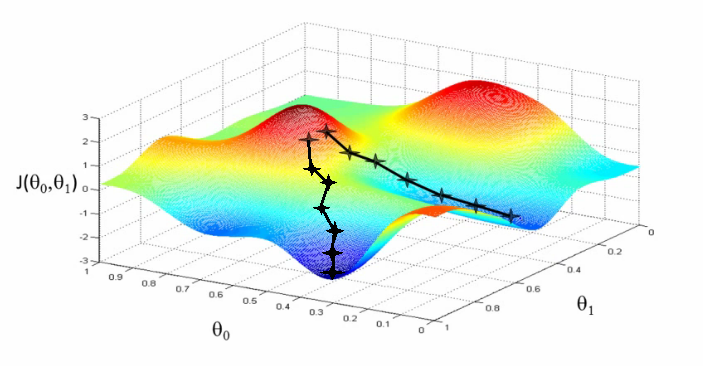

The frequentionist is only a part of the bayesian. In the bayesian framework, we encoded our prior knowledge about model parameters before seeing any data. With the right hit, we could achieve high accuracy without any training. However, in the frequentionist approach, we derive learning from the maximum likelihood estimation of the parameters. It means maximizing the probability of the data, given the model parameters:
$$\text{arg max}_\theta p(\mathcal{D}|\theta)$$

In general, calculating is not trivial and almost always impossible to find an analytical solution. This is where we opt for optimizing by using gradient descent. We are looking for a set of parameters, where the gradient is equal to 0:
$$\nabla_\theta p(\mathcal{D}|\theta) = 0$$

From that equation, we are able to derive a weight update $\Delta\theta_i$ that improves the performance of the neural network, when the update is applied.

## Criterions

To measure how bad or good our neural network is, we need to define a criterion. In general, it measures performance. There are few requirements to be met by a function so that the function can be considered a proper criterion for gradient optimization:
- it needs to be at least $C^1$ differentiable (it has at least one derivative)
- it has to be a minimized function, so the best parameters are obtained through $\text{arg min}_\theta \mathcal{L}$ (note, that for maximized functions, we can simply use $-\mathcal{L}$.

There are a few common criterions. The choice depends on the application of our network. For a ground truth $y_i$ and network's prediction $\hat{y}_i = f_\theta(x_i)$ for a $i$-th sample, we can use:
1. squared error (for the regression task):
$$\mathcal{L}(y, \hat{y}) = \frac{1}{2}(y - \hat{y})^2$$

So, in general, it measures how far our prediction is from the ground truth. The higher the difference, the higher the loss value. 

2. binary crossentropy (for the classication task with binary class only):
$$\mathcal{L}(y, \hat{y}) = -y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i)$$
The definition comes from the information theory. The lower the entropy, the more we know about the system. The smallest possible value is obtained when, intuitively, $y_i = 1 \land \hat{y}_i = 1$ and $y_i = 0 \land \hat{y}_i = 0$.

3. categorical crossentropy (for the classification task with many exclusive classes)
$$\mathcal{L}(y, \hat{y}) = -\sum^K_{k=1}y_k \log \hat{y}_k$$

The loss assumes that both vectors $y$ and $\hat{y}$ follows the definition of the proper probability distribution (values in range \[0, 1\], and sum to 1), which is typical for the softmax outputs (one of the activation functions). When a particular activation is applied, the gradient of that function simplifies significantly, which stabilizes learning. Features of that loss are the same as for its binary equivalent. 


Having one of these losses chosen, we can train our neural network. However, we often meet other elements as activation functions that need to be clarified.

## Activation functions

Activations are simple, non-linear functions that transform input data into output data with the same dimensions. They were introduced mainly for two reasons.

It is proven, that biological neural network, perform some non-linearity on the input signal coming from the input dendrites. The potential action is measured as a function over the sum of the input signals
![Action potential](https://thumbor.kenhub.com/jc8pXlmJt3eaZvFiI8fCGUzbOnY=/fit-in/800x1600/filters:watermark(/images/logo_url.png,-10,-10,0):background_color(FFFFFF):format(jpeg)/images/library/11522/Action_potential_curve.png)

So the biological neuron aggregates the signal, and when the aggregation hits a specific threshold value, the neuron "unlocks" and passes the signal to the synapse (output). The biological analogy is shown below:
![Biological analogy](https://miro.medium.com/max/610/1*SJPacPhP4KDEB1AdhOFy_Q.png)

In the era of biological analogies (1950s), the activation function followed the idea of the threshold function.

The second reason is strictly mathematical. Since the weighted sum is just a linear operation, stacking multiple layers that perform the same weighted sum with different sets of weights is also a linear operation. It implies that in such a situation, multiple layers can be combined into a single layer. This causes that problems that are not **linearly separable** cannot be solved. Example of the not linearly separable problem is shown below:

![Linear separability](https://sites.google.com/site/datasciencenotebook1/_/rsrc/1471675067253/binary-classification/kernel-methods/Screen%20Shot%202016-08-20%20at%2012.06.34%20PM.png?height=213&width=320)

Non-linear separability means that there is no such an $N - 1$ dimensional hyperplane or a plane that can split the $N$ dimensional data into two classes. To achieve this, we have to introduce some non-linearity to neural networks. When stacked in multiple layers, they can approximate any function (theoretically). As for the criterion, an activation function has to be differentiable (there are some exceptions, but we will not dive into them). There are some popular activations such as (denoted in general as $\sigma(x)$):

1. Sigmoid \
Equation: $\sigma(x) = \frac{1}{1 + e^{-x}}$ \
Values range: \[0, 1\] \
Shape:\
![Sigmoid shape](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)\
Good for:
- binary classification
- Bernoulli probability description
- before ReLU, the sigmoid was a standard for hidden units\
Bad for:
- deep neural networks ([vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)
- time sensitive applications (in fact, many such sigmoids is time consuming to calculate for low-end hardware)

2. Hyperbolic tangent (tanh)\
Equation: $\sigma(x) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$\
Values range: \[-1, 1\]
Shape:\
![Tanh shape](https://www.mathworks.com/help/examples/matlab/win64/GraphHyperbolicTangentFunctionExample_01.png)\
Good for:
- binary classification for $y \in \{-1, 1\}$
- hidden units bounded on both sides (due to symmetrical nature), for example in recurrent neural networks\
Bad for:
- deep neural networks ([vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)
- time sensitive applications (in fact, many such sigmoids is time consuming to calculate for low-end hardware)

3. rectified linaer unit (ReLU)\
Equation: $\sigma(x) = \max(0, x)$\
Values range: $[0, \infty]$\
![Relu shape](https://www.researchgate.net/profile/Chao_Zhang20/publication/320402742/figure/fig13/AS:661131760791554@1534637503754/Sigmoid-ReLU-and-soft-ReLU-functions.png)\
Good for:
- deep neural networks (no vanishing gradient)
- bounded linear regression\
Bad for:
- badly defined neural network ([exploding gradient](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/))
- very deep neural networks (more than 20 layers) due to dying neurons (activation equal to 0 due to negative values of the neuron)

4. softmax\
Equation: $\sigma(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$\
Values range: $[0, 1]$\
(no explicit shape due to dependence on a scale of other values)\
Good for:
- last layer as a multiclass classification
- describing probabilities of the multinomial distribution
- the best with categorical crossentropy\
Bad for:
- hidden units activation

There are also many more, but you will meet the above mentioned in 99% of the papers about different NN architectures. Many articles apply some modifications to the standard activation function, for example, using some alterations of the ReLU to mitigate the problem of dying neurons (ex. LeakyReLU that allows negative values to pass through neural network with activation as $\max(\alpha x, x)$)

## Optimizing

Finally, we can derive equations necessary to learn our neural networks. We will work with the neural network presented in the first figure, and we will train it using stochastic gradients descent. Both the hidden layer and the output layer are activated with the sigmoid function. Stochastic means that we take few samples at once calculating gradients for them, average gradients over these samples, and then apply as corrections to learnable parameters. These batches of data are called mini-batches.

The algorithm introduced below is called backpropagation.

The neural networks consists of $N$ input neurons, $M$ hidden neurons and $K$ output neurons. Each mini-batch consists of $B$ samples. Weights $w$ and $v$ are learnable. Output of the network is described then as:

$$ \hat{y}_{bk} = \sigma_{bk}\left( \sum_{m=1}^M v_{mk} \sigma_{bm}\left(\sum_{n=1}^N w_{nm} x_{bn} \right) \right)$$

Indices $k$ means the $k$-th of the sample. All equations are applied independently to each sample in the mini-batch. Calculated gradients of weights are averaged over samples in the mini-batch. By dropping biases, we leave to the reader derivation of biases updates as a practice. Note, that gradients for biases are derived in an analogical way as for weights.

Now, we need a criterion. Let's say that the task is a binary classification task (hence, the sigmoid function in the last layer). We will use mean squared error:

$$ C = \frac{1}{2B} \sum_{b=1}^B\sum_{k=1}^K (y_{bk} - \hat{y}_{bk})^2 $$

$y_{bk}$ are ground truth classes encoded as one-hot vectors. It means that 3rd class out of possible 5 classes is encoded as a vector: $[0, 0, 1, 0, 0]$.

To update weights $w$ and $v$, we need gradients of these weights over defined criterion:

$$ \frac{\partial C}{\partial w_{nm}}, \frac{\partial C}{\partial v_{mk}}$$

Generally, direct computing these gradients would require a brilliant mind and great memory. To overcome the lack of these abilities, we use the chain rule, that help us decompose heavy calculation into simpler ones. We drop $b$ indices for notational simplicity. Note that gradients are calculated for each sample independently and averaged over samples in the mini-batch (this can be proven by including all the indices).

$$
\frac{\partial C}{\partial v_{mk}} = \frac{\partial C}{\partial \sigma_{k}}\frac{\partial \sigma_{k}}{\partial \delta_k}\frac{\partial \delta_k}{\partial v_{mk}}
$$


$$
\frac{\partial C}{\partial w_{nm}} = \frac{\partial C}{\partial \sigma_{k}}\frac{\partial \sigma_{k}}{\partial \delta_{k}} \frac{\partial \delta_{k}}{\partial \sigma_m} \frac{\partial \sigma_m}{\partial \delta_{n}}\frac{\partial \delta_n}{\partial x_n}
$$

where $\sigma_{k}$ and $\sigma_{m}$ denotes activated hidden and input units respectively for $b$-th sample, and $\delta_{k}$ and $\delta_{m}$ are raw values (before the activation function). At this point, we forgot that in the forward equation to get $\hat{y}_k$, we had sums. We have to include them in these chains. Notice, that some variables do not depend on these sums, for example, $w_{nm}$ does not depend on the sum over $K$ classes. So full equations can be written as:

$$
\frac{\partial C}{\partial v_{mk}} \rightarrow \text{unchanged}
$$


$$
\frac{\partial C}{\partial w_{nm}} = \frac{\partial \sigma_m}{\partial \delta_{n}}\frac{\partial \delta_n}{\partial x_n}\sum_{k=1}^K\frac{\partial C}{\partial \sigma_{k}}\frac{\partial \sigma_{k}}{\partial \delta_{k}} \frac{\partial \delta_{k}}{\partial \sigma_m} 
$$



Having these equation simplified, we can calculate derivative for each component. We recall that a derivatives for each equation are as follows:
- sigmoid: $\sigma'(x) = \sigma(x)(1 - \sigma(x))$
- tanh: $1 - \text{tanh}^2(x)$
- relu: 
$$ 
\sigma'(x) = \begin{cases} 
    1, & x \geq 0 \\
    0, & \text{otherwise}
\end{cases}
$$ 

- softmax: 

for the equation:
$$
\sigma(x_i) = \frac{e^{x_i}}{\sum_{j=1}^K e^{x_j}}
$$
it equals to:
$$
\sigma'(x_i) = \begin{cases}
    x_i(1 - x_i), & i = j \\
    -x_i x_j, & i \neq j
\end{cases}
$$

No we have all components to solve these derivative chains. We assume that $\hat{y}_k = \sigma_k$ and both $\sigma_k$ and $\sigma_m$ are sigmoid functions.

$$
\begin{align}
    \delta_m &= \sum_{n=1}^N x_{n} w_{nm} \\
    \delta_k &= \sum_{m=1}^M v_{mk}\sigma_m\left(\delta_m \right) \\
    \frac{\partial C}{\partial \sigma_k} &= \frac{\partial}{\partial \sigma_k} \frac{1}{2}\sum_{k=1}^K\left(y_k - \sigma_k(\delta_k)\right)^2 = -\sigma_k(\delta_k)\left(y_k - \sigma_k(\delta_k)\right) \\ 
    \frac{\partial \sigma_k}{\partial \delta_k} &= \sigma_k(\delta_k)(1 - \sigma_k(\delta_k)) \\
    \frac{\partial \delta_k}{\partial v_{mk}} &= \frac{\partial}{\partial v_{mk}} \sum^M_{m=1} v_{mk}\sigma_m(\delta_m) = \sigma_m(\delta_m) \\
\end{align}
$$

At this point we have, gradients ready to be applied for weights $v$. We can further derive updates for $w$.

$$
\begin{align}
    \frac{\partial \delta_k}{\partial \sigma_m} &= \frac{\partial}{\partial \sigma_m(\delta_m)} \sum^M_{m=1}v_{mk}\sigma_m(\delta_m) = v_{mk} \\
    \frac{\partial \sigma_m}{\partial \delta_m} &= \sigma_m(\delta_m)(1 - \sigma_m(\delta_m)) \\
    \frac{\partial \delta_m}{\partial w_{nm}} &= \frac{\partial}{\partial w_{nm}} \sum^N_{n=1} x_n w_{nm} = x_n
\end{align}
$$

Now, we are ready to apply these partial derivatives to the chains mentioned above.

$$
\begin{align}
    \frac{\partial C}{\partial v_{mk}} &= -\sigma_k(\delta_k)(y_k - \sigma_k(\delta_k))\sigma_k(\delta_k)(1 - \sigma_k(\delta_k))\sigma_m(\delta_m) \\
    \frac{\partial C}{\partial w_{nm}} &= \sigma_m(\delta_m)(1 - \sigma_m(\delta_m)) x_n\sum_{k=1}^K -\sigma_k(\delta_k)(y_k - \sigma_k(\delta_k))\sigma_k(\delta_k)(1 - \sigma_k(\delta_k))v_{mk}
\end{align}
$$

Pretty neat, huh? In the same way, we can derive full updates for any neural network architecture with any loss function and any activation function. That framework comes from the requirement that each function is differentiable.

You can be tempted to use `for` loops in a programming language of choice. However, most programming libraries use matrix notation, and these sums can be easily replaced with dot products. Thus, we can calculate multiple gradients at once.

Ok, but how can we use these partial derivatives? The general formula for a weight update from a step $t$ in step $t + 1$ is described as:
$$
w^{t+1} = w^t - \alpha \frac{\partial C}{\partial w}
$$

where $\alpha$ is a learning rate. This is a standard update formula for gradient descent. Stochastic gradient descent would include averaging (or summing, depending on a framework) over $B$ samples. Many other adaptive optimizers account for additional derivate moments (averages over last $S$ steps) to provide so-called momentum and stabilize learning. These optimizers are often a standard choice. We ask you to refer to the following works if you would like to learn more about them: 
- [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/) - one of the most complete overview
- [ADADELTA: An Adaptive Learning Rate Method](https://arxiv.org/abs/1212.5701)
- [Overview of mini-batch gradient descent](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf) - it is said that RMSprop was invented during this lecture by prof. Hinton
- [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980)

Now, we have to just plug these equations as:
$$
\begin{align}
    v_{mk}^{t+1} &= v_{mk}^t - \alpha \frac{\partial C}{\partial v_{mk}}  \\
    v_{nm}^{t+1} &= v_{nm}^t - \alpha \frac{\partial C}{\partial w_{nm}} 
\end{align}
$$

We remind that the algorithm above is called backpropagation and is widely used for neural networks to this date. $\alpha$ is a hyperparameter that has to be tuned manually.

## Autograd

However, for deeper neural networks, it would be daunting to derive all these partial derivates. Not mentioning complex neural architectures where we over 100 layers, 4 million parameters, and multiple parallel branches that are joined at some stage to get the final prediction.

Notice how simple it was to convert a complex partial derivative into a sequence of simple, one-level depth partial derivatives. Could it be simpler? Of course, it could. We would have to simplify these equations even further, so we would be left just with additions and multiplications of scalars, without any functions such as a sigmoid. Then, we would have to write simple rules into nodes of the graph, where each node represents an atomic operation, such as an addition, and edges represent derivates of nodes. Programmatically, it is achievable in a short amount of time.

Current frameworks use such simplifications and automation in their auto differentiating methods. This way, the only thing that we have to implement is the forward inference. The backward pass is calculated automatically. But how these methods are constructed. Let us introduce directed acyclic graphs of computation.

We start with a simple function. We want to calculate something like:

$$
y = A(x)
$$

and for simplicity, introduce some intermediate variable $a = A(x)$ that will hold the value before returning it to $y$. Now, we build our computation graph:

![simple graph](assets/graph.png)

We want to calculate $\frac{\partial y}{\partial x}$. We proceed as follows:

1. Start with calculating $\frac{\partial y}{\partial y} = 1$
2. Then, calculate $\frac{\partial y}{\partial a} = 1$ (because it is an intermediate result $ = y$
3. End with $\frac{\partial a}{\partial x} = A'(x) \cdot 1$

All these computations are multiplied to get our final: $\frac{\partial y}{\partial x} = 1 \cdot 1 \cdot A'(x)$. The final graph is as follows:

![completed simple graph](assets/completed-graph.png)

To summarize:
1. Nodes are simple operations.
2. Edges are derivates of nodes on each end.
3. Derivatives in a sequence of edges are multiplied.
4. Derivatives in parallel branches joined together, are summed.

These graphs can be arbitrarily complex, but local computations are still simple.

![complex](assets/morecomplex.png)

There are also different approaches on how to calculate a jacobian efficiently (row-wise or column-wise). Still, we will not dive into them (you will these during your 2nd semester in Deep Learning course).

To understand it further, I highly recommend to checkout [the code by Andrey Karpathy](https://github.com/karpathy/micrograd) (CTO of Tesla and one of the pioneers in deep learning). The author implemented the autograd in a minimal number of LOC.

Also, for more information, we ask you to refer to [this](http://videolectures.net/deeplearning2017_johnson_automatic_differentiation/) lecture. All images in this cell were taken from that lecture.

It is worth mentioning that different frameworks implemented these graphs differently. For example, TensorFlow, before version 2.0, used static computation fact. That way, the TensorFlow was the fastest library, and it was easy to distribute computation over a cluster. Nowadays, both PyTorch and TensorFlow 2.0, derive the graph dynamically by inspecting call stack. Each operation, even `+` and `-` causes that the framework handles this operation and registers it in its own graph. Each simple operation is overloaded (for example, PyTorch uses `Function` class), so it implements both forward and backward pass.

## Regularization techniques

These blocks above are all we have to know about neural networks to use them for simple tasks, such as classification of handwritten digits. However, there exists a notion of overfitting. In short, when overfitting occurs, our model performs well on the data that it was trained on, but performs poorly any testing data, that model did not see. It is a common phenomenon, so many researchers devoted their time to tackle it. To visualize it: imagine that you obtained a dataset that consists of 1000 samples. You built a neural network that has 10 000 learnable parameters. Theoretically, each neuron "encoded" one sample, so it serves as a switch - if the example occurs, it switches on and switches off otherwise. For new samples, that were not available in the dataset, the model will crash (ex. return wrong classification decision), since it does not have any switches for these samples. 

On the other hand, underfitting occurs when our model has so few parameters (there are also other factors, of course), that it is unable to match any point. 

Example visualization for each situation is presented as follows:

![overfitting](https://www.educative.io/api/edpresso/shot/6668977167138816/image/5033807687188480)

Preventing overfitting comes from regularization techniques. Regularization means reducing degrees of freedom, so the model, theoretically, generalizes better to unseen data. You have already met a few of them ($L_1$ and $L_2$ regularization), but the list is long. Some more popular are defined as follows.

### $L_1$

$L_1$ reduces magnitudes of weights $w$. We introduce it in a loss function as ($N$ learnable parameters):

$$
\mathcal{L}_\lambda = \mathcal{L} + \lambda\sum^{N}_{i=1}|w_i|
$$

where $|\cdot|$ means taking an absolute value. By deriving the gradients of that loss, we can notices what happens to weights during an update:

$$
\begin{align}
\frac{\partial L_1}{\partial w_i} &= \lambda \frac{w_i}{|w_i|} \\
w_i^{t+1} &= w_i^t - \alpha \frac{\partial C}{\partial w_i} - \lambda \frac{w_i}{|w_i|}
\end{align}
$$

Such a loss leads to the network sparsification, since many parameters will be led to 0. $\lambda$ is a hyperparameter that has to be tuned manually.

### $L_2$

Less restrictive loss, is an $L_2$ regularization. It is defined as:

$$
\mathcal{L}_\lambda = \mathcal{L} + \lambda\sum^{N}_{i=1}w_i^2
$$

Similarily, it reduces parameter's magnitude but the strength of the regularization is decreases with the magnitude of the weight since:
$$
\begin{align}
\frac{\partial L_1}{\partial w_i} &= \frac{\lambda}{2} w_i \\
w_i^{t+1} &= w_i^t - \alpha \frac{\partial C}{\partial w_i} - \frac{\lambda}{2} w_i
\end{align}
$$

We can see that it does not lead to zeroing weights.

### Dropout

The last of common practice is to apply dropout. The technique was first described in [Dropout: A Simple Way to Prevent Neural Networks from
Overfitting](http://jmlr.org/papers/v15/srivastava14a.html). It works as follows:

1. We sample a mask $m$ from a Bernoulli distribution with a probability $p$. The mask is the size of the input (for $x$ of size 16, we create a mask of 16 elements consisting only 0s and 1s)
2. We multiply the mask by the mask $m$ and pass values forward. 
3. Since we changed the total distribution of activations (to be more precise - decreased their sum), we have to divide all activations by $p$ to mitigate to the problem. Otherwise, the learning would be unstable.
4. During backpropagation, we pass the signal through neurons that stayed activated during the forward inference.
5. For testing, we disable dropout like it never existed.

Let us explain why it is necessary. During the learning of a standard network, we sample initial weights from some distribution (commonly, normal). If weights are almost the same in value and are responsible for features that are correlated, they will be updated in the same fashion. In short, it causes neurons to be highly correlated, thus making them redundant and prone to overfitting. The dropout decorrelates these weights because sometimes one weight is updated, while the others are not. 

Another interpretation is that we train multiple neural networks at once, that are correlated (correlation of networks is not the same as correlation of particular weights). This creates an ensemble of neural networks that, theoretically, should increase generalization power by variance reduction. We can, of course, hold the variance to be at a similar lever by increasing the number of learnable weights.

These interpretations make dropout one of the most powerful utility to regularize the networks. Even though the method was invented in 2014, it, together with its variants, is commonly used to this date.

## References

We can encourage you to read more about neural networks on your own. One reason is that these are a method of choice in the presence of high volumes of data. Also, they drop the necessity to analyze datasets in depth, since they learn automatically what features are necessary and how they are correlated.

- [Feedforward Networks and Backpropagation](https://ttic.uchicago.edu/~shubhendu/Pages/Files/Lecture3_flat.pdf)
- [Deep Learning. Deep Feedforward Networks](https://www.deeplearningbook.org/contents/mlp.html)


## Implementing simple neural networks using `pytorch`

Neural networks can seem to be a complex notion at first glance. However, accomodating them into their objects will make you more confident about the theory behind them. This especially applies to nuanced problems when even an initialization of weights matters. 

To start with a simple task, we will implement a simple neural network with `pytorch` library and learn it to classify handwritten digits. We will use the power of the autograd, so we will not have to implement gradients calculation on our own.

### Data

You will work with the MNIST dataset of handwritten digits. It looks like this:

![mnist](https://cdn-images-1.medium.com/max/800/0*At0wJRULTXvyA3EK.png)

Each image is of size 28x28, saved as values in a range of $[0, 255]$. It is debatable whether classes assigned to all images are correct, but the dataset serves well as a toy benchmark dataset. Many researchers try their methods on this dataset as a first try - if the method can be trained on it, it is worth to try it on more complex datasets.

### Implementing base class and parameters

We start by defining our base classes, using `nn.Module`. Subclassing that class causes that any parameters defined in `__init__` will be automatically registered "as learnable parameters". It is also used to define what variables should be saved after training.

We create a so-called, multilayer perceptron which is just a feedforward network with at least one hidden layer. As activation functions, we will use a sigmoid function and a softmax. The whole network will be trained using MSE loss.

In [14]:
import torch
import torch.nn as nn

### Implementing custom feed forward layer, activation function and MSE loss

In [15]:
# implementing custom linear layer and sigmoid activation function

class OwnLinear(nn.Module):   # subclassing nn.Module, definition of our own fully connected layer
    def __init__(
        self, 
        num_input_features: int,  # number of input features
        num_output_features: int,  # number of output features
        use_bias: bool  # whether to use bias
    ):
        super().__init__()
        self.num_input_features = num_input_features
        self.num_output_features = num_output_features
        
        self.use_bias = use_bias
        
        self.weight = nn.Parameter(
            torch.Tensor(num_input_features, num_output_features),
            requires_grad=True
        )
        
        if self.use_bias:
            self.bias = nn.Parameter(
                torch.Tensor(num_output_features),
                requires_grad=True
            )
        else:
            self.register_parameter("bias", None)  # register a placeholder, necessary for loading
        self.init_params()
    
    def init_params(self):
        nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            nn.init.uniform_(self.bias, -0.01, 0.01)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.matmul(self.weight)
        if self.bias is not None:
            x = x + self.bias
        return x
            

# implementation of own activation sigmoid
class OwnSigmoid(nn.Module):
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return 1 / (1 + (-x).exp())
    
# implementation of softmax
class OwnSoftmax(nn.Module):
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        numerator = x.exp()
        denominator = numerator.sum(dim=1, keepdim=True)
        # keepdim is important to keep the same dimensions as numerator
        # otherwise the division wouldn't work
        return numerator / denominator
    
# implementation of mse loss
class MSELoss(nn.Module):
    def forward(
        self,
        y_predicted: torch.Tensor,
        y_ground_truth: torch.Tensor,
    ) -> torch.Tensor:
        squared_differences = (y_predicted - y_ground_truth).pow(2)
        sum_over_classes = squared_differences.sum(dim=-1)
        average_over_samples = sum_over_classes.mean(dim=0)
        return average_over_samples

### Implementing MLP

In [16]:
class MLP(nn.Module):  # subclassing nn.Module, definition of our multilayer perceptron
    def __init__(
        self, 
        num_input_features: int,  # number of input features (28 x 28 for MNIST)
        num_hidden_features: int,  # number of hidden units
        num_output_classes: int,  # number of output classes
        hidden_activation_function: type,  #  hidden activation function class
        output_activation_function: type,  # output activation function class
    ):
        super().__init__()
        
        # definition of feed forward layers
        self.layer_input_to_hidden = OwnLinear(num_input_features, num_hidden_features, use_bias=True)
        self.layer_hidden_to_output = OwnLinear(num_hidden_features, num_output_classes, use_bias=True)
        
        self.hidden_activation = hidden_activation_function()  # calling constructor
        self.output_activation = output_activation_function()  # calling constructor
        
        # the above can be also constructed as
        # self.layers = nn.Sequential([
        #     nn.Linear(num_input_features, num_hidden_features, bias=True),
        #     hidden_activation(),
        #     nn.Linear(num_hidden_features, num_output_classes, bias=True),
        #     output_activation()
        # ])
        
    # definition of the forward inference
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # each forward is called by __call__ magic, that is implemented in each layer
        x = self.layer_input_to_hidden(x)
        x = self.hidden_activation(x)
        x = self.layer_hidden_to_output(x)
        x = self.output_activation(x)
        return x
        

### Loading data

In [17]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from tqdm.notebook import tqdm
from src.utils import Analyzer, visualize_samples, visualize_weights

import numpy as np

np.random.seed(0)

In [18]:
class IntegerToOneHotConverter:
    def __init__(self, num_classes: int):
        self._code = torch.eye(num_classes)
        
    def __call__(self, class_num: int):
        return self._code[class_num]

In [19]:
train_dataset = MNIST(
    "data",  # folder where data should be saved
    download=True, 
    transform=ToTensor(),  # transform to convert images to torch tensors
    target_transform=IntegerToOneHotConverter(10), 
)
test_dataset = MNIST(
    "data",  # folder where data should be saved
    download=True,
    train=False, 
    transform=ToTensor(), # transform to convert to torch tensors
    target_transform=IntegerToOneHotConverter(10), 
)

# limiting for faster training
indices = np.random.permutation(len(train_dataset.data))[:10_000]
train_dataset.data = train_dataset.data[indices]
train_dataset.targets = train_dataset.targets[indices]

In [20]:
# using a base class that provides automatic batching of the data
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True,
)

test_loader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=False,
    drop_last=False,
)

### Model initialization

In [21]:
model = MLP(
    num_input_features=28 * 28,  # pixels
    num_hidden_features=128,  # arbitrary number
    num_output_classes=10,  # num of digits
    hidden_activation_function=OwnSigmoid,
    output_activation_function=OwnSoftmax,
)

loss_fun = MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(),  # list of trainable parameters
    lr=1e-3,  # learning rate (alpha in equations above)
)

### Training time!

We will measure model performance by using its accuracy on test data and obtained loss.

In [22]:
epochs = 20
train_metrics = {
    "loss": [],
    "acc": [],
    "step": [],
}
test_metrics = {
    "loss": [],
    "acc": [],
    "step": [],
}

global_step = 0

for epoch in range(epochs):
    print(f"Epoch: {epoch + 1} / {epochs}")
    
    # training step
    model.train()  # enable training mode
    # this method sets `model.training = True`
    pbar = tqdm(train_loader)
    for inputs, targets in pbar:
        optimizer.zero_grad()  # zeroing any existing gradients
        inputs = inputs.view((-1, 28 * 28))  # reshaping to vector
        y_predictions = model(inputs)
        
        loss = loss_fun(y_predictions, targets)
        loss.backward()  # backpropagation
        
        optimizer.step()  # applying gradients (partial derivatives)
        accuracy = (
            y_predictions.argmax(dim=1) == targets.argmax(dim=1)
        ).float().mean()
        
        train_metrics["loss"].append(loss.item())
        train_metrics["acc"].append(accuracy.item())
        train_metrics["step"].append(global_step)
        global_step += 1
        pbar.update(1)
    pbar.close()
    
    # validating step
    model.eval()  # enable training mode
    # this method sets `model.training = False`
    
    preds = []
    trues = []
    for inputs, targets in test_loader:
        inputs = inputs.view((-1, 28 * 28))  # reshaping to vector
        y_predictions = model(inputs)
        trues.append(targets)
        preds.append(y_predictions)
    
    preds = torch.cat(preds, dim=0)
    trues = torch.cat(trues, dim=0)
    
    val_loss = loss_fun(preds, trues)
    val_acc = (
        preds.argmax(dim=1) == trues.argmax(dim=1)
    ).float().mean()
        
    test_metrics["loss"].append(val_loss.item())
    test_metrics["acc"].append(val_acc.item())
    test_metrics["step"].append(global_step)
        

Epoch: 1 / 20



Epoch: 2 / 20



Epoch: 3 / 20



Epoch: 4 / 20



Epoch: 5 / 20



Epoch: 6 / 20



Epoch: 7 / 20



Epoch: 8 / 20



Epoch: 9 / 20



Epoch: 10 / 20



Epoch: 11 / 20



Epoch: 12 / 20



Epoch: 13 / 20



Epoch: 14 / 20



Epoch: 15 / 20



Epoch: 16 / 20



Epoch: 17 / 20



Epoch: 18 / 20



Epoch: 19 / 20



Epoch: 20 / 20


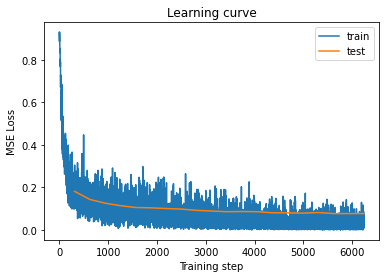

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    train_metrics["step"],
    train_metrics["loss"],
    label="train"
)
plt.plot(
    test_metrics["step"],
    test_metrics["loss"],
    label="test"
)
plt.xlabel("Training step")
plt.ylabel("MSE Loss")
plt.title("Learning curve")
plt.legend()

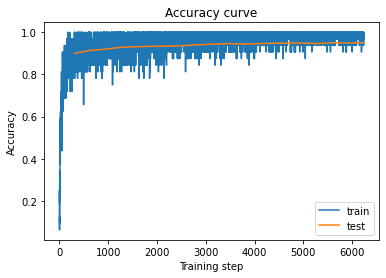

In [24]:
plt.figure()
plt.plot(
    train_metrics["step"],
    train_metrics["acc"],
    label="train"
)
plt.plot(
    test_metrics["step"],
    test_metrics["acc"],
    label="test"
)
plt.xlabel("Training step")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.legend()

In [25]:
print(f"Best training accuracy: {max(train_metrics['acc'])}")
print(f"Best testing accuracy: {max(test_metrics['acc'])}")

Best training accuracy: 1.0
Best testing accuracy: 0.9505000114440918


## What is the deal?

Now, we barely scratched the surface of the model analysis. Of course, we know its accuracy, learning, etc. But about that 5% that we did not achieve? Are those samples challenging to recognize? How can we be sure that we, humans, would produce similar scores? Remember that models can easily overfit to data.

We proceed to predictions analysis. This part is difficult as it often requires writing much amount of code. But the only limit is our imagination of what we want to find out about our model.

We tackle two kinds of analyses:
1. Analysis of confidence on samples where the model made a mistake
2. Weights distribution (histograms) 

### Plotting point estimates

The first analysis is a simple one: find out where our model made a mistake, check its confidence - if the confidence is low, we probably can handle it by augmenting our training data. If the confidence is high, we can try on regularization techniques. Of course, the sample has to be annotated correctly in the first place.

"Point estimate" means that we have a single confidence value, not its distribution. This is why we want to introduce this analysis since bayesian learning shines in estimating uncertainty.

In [26]:
analyzer = Analyzer(model, test_dataset, 1)

Top high confidence correct predictions


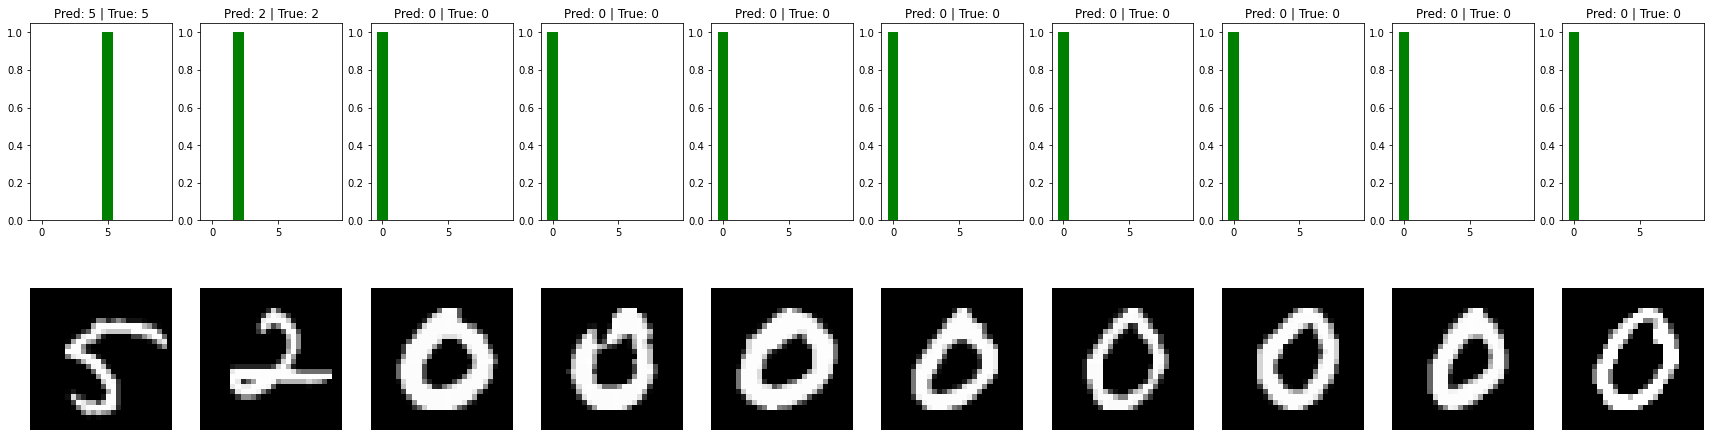

In [27]:
visualize_samples(
    *analyzer.get_top_k_high_confidence_correct(10)
)
print("Top high confidence correct predictions")

Top low confidence correct predictions


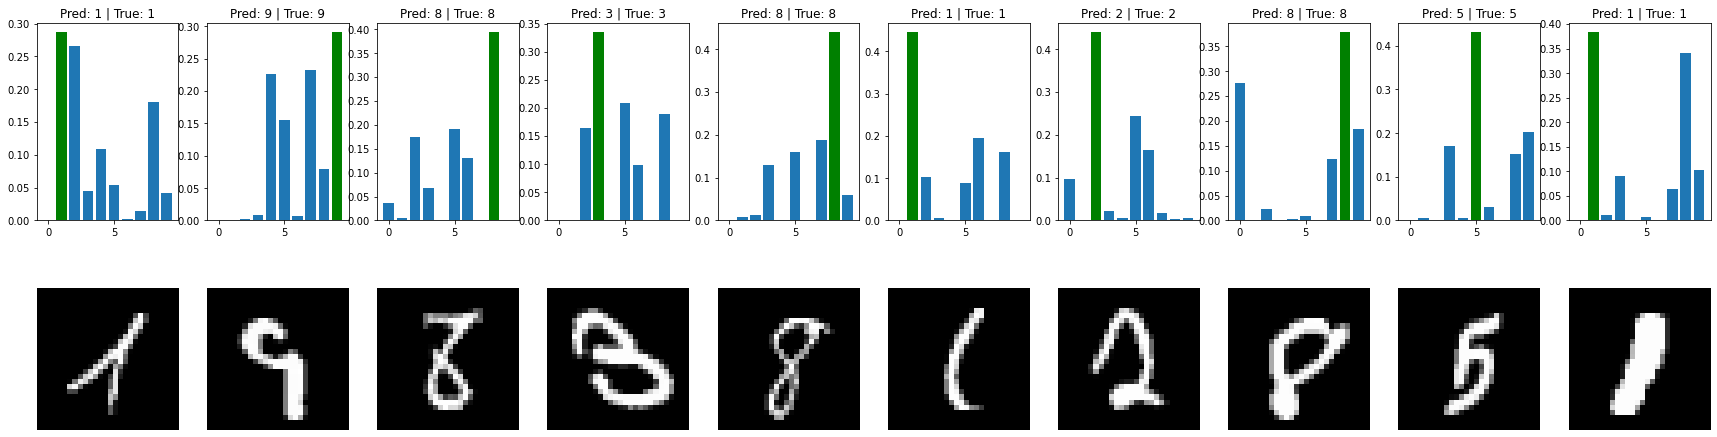

In [28]:
visualize_samples(
    *analyzer.get_top_k_low_confidence_correct(10)
)
print("Top low confidence correct predictions")

Top low confidence wrong predictions


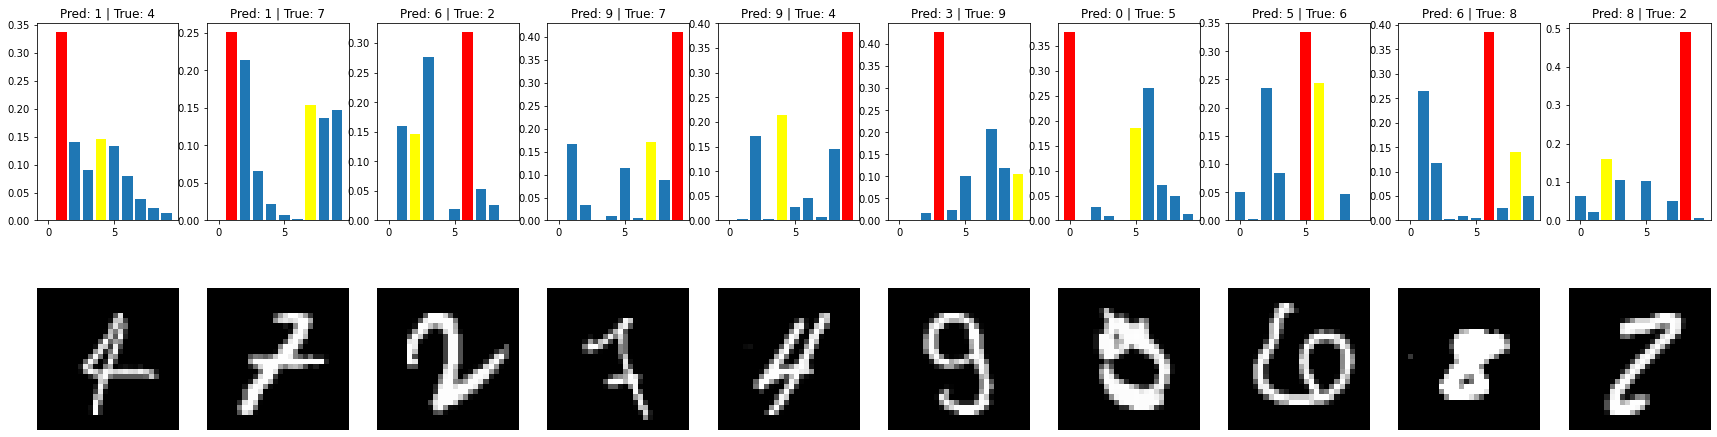

In [29]:
visualize_samples(
    *analyzer.get_top_k_low_confidence_mistakes(10)
)

print("Top low confidence wrong predictions")

Top high confidence wrong predictions


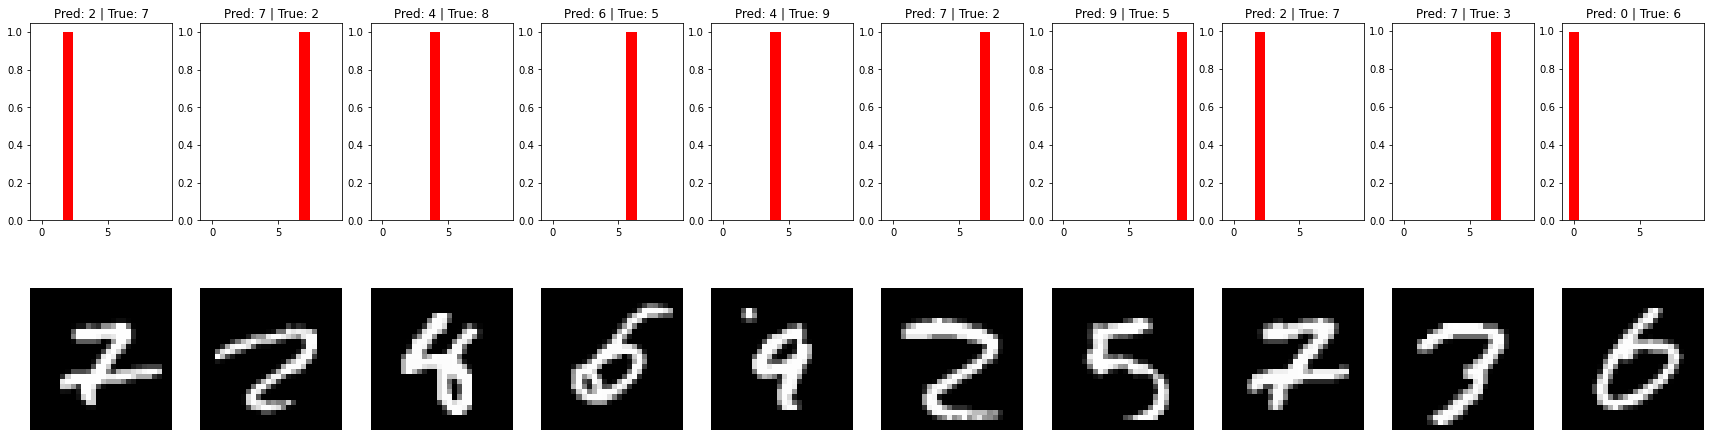

In [30]:
visualize_samples(
    *analyzer.get_top_k_high_confidence_mistakes(10)
)

print("Top high confidence wrong predictions")

### Weights distribution

Histogram of weights for layer 1


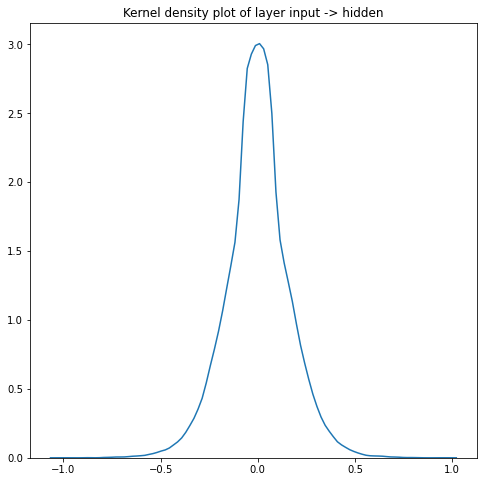

In [32]:
from src import utils
utils.visualize_weights(
    model.layer_input_to_hidden.weight,
    "layer input -> hidden"
)
print("Histogram of weights for layer 1")

Histogram of weights for layer 2


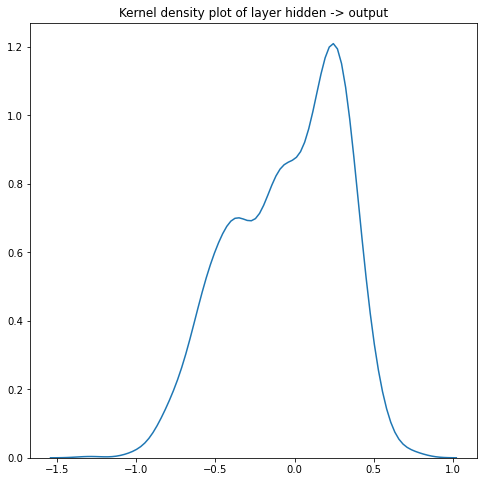

In [33]:
utils.visualize_weights(
    model.layer_hidden_to_output.weight,
    "layer hidden -> output"
)
print("Histogram of weights for layer 2")

### Remarks

As you can notice, there are cases were our network predicts the wrong digit with high confidence. By know, the network is uncertain for cases where samples do not match anything in the training dataset. Is it possible to modify the network in such a way that would incorporate bayesian inference to estimate uncertainty about predictions? Yes, we can. We will dive into two frameworks:

1. [Weight Uncertainty in Neural Networks](https://arxiv.org/abs/1505.05424)
2. [Dropout as a Bayesian Approximation: Representing Model Uncertainty in Deep Learning](https://arxiv.org/abs/1506.02142)

In [96]:
inputs = 10
x = nn.Parameter(torch.rand(inputs))
y = nn.Parameter(torch.rand(1,inputs))

In [100]:
x
y

torch.Size([1, 10])

In [134]:
c = 10
x = torch.distributions.Normal(0,1).sample((c,))
x

tensor([ 0.2285, -0.0337, -1.9268,  1.3320, -0.5882, -0.1748,  1.8391, -0.0209,
        -1.5434, -0.0713])

In [95]:
x+y*y

tensor([[0.1943, 0.3101, 0.2332, 0.3981, 0.8192, 1.5988, 0.9052, 0.8211, 0.8330,
         0.3987]], grad_fn=<AddBackward0>)

In [72]:
import math
PI = 0.5
SIGMA_1 = torch.FloatTensor([math.exp(-0)])
SIGMA_2 = torch.FloatTensor([math.exp(-6)])

In [73]:
SIGMA_1

tensor([1.])

In [74]:
SIGMA_2

tensor([0.0025])

In [135]:
torch.FloatTensor([math.exp(-0)])

tensor([1.])

RuntimeError: bool value of Tensor with more than one value is ambiguous